<a href="https://colab.research.google.com/github/seungbinahn/START_AI/blob/master/02_Machine_Learning%E2%80%8E/04_2_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic 데이터 생존 예측 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train.csv') # 트레인 데이서 읽기
titanic_df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* name: 탑승자 이름
* sex: 탑승자 성별, (male, female)
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 데이터 전처리

In [3]:
# NULL 컬럼들에 대한 처리
print(titanic_df.isnull().sum()) # 각 칼럼에 대한 null 개수
print(titanic_df.isnull().sum().sum()) # null의 총 개수

# NaN 값 채우기
titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True) # inplace : 원본 데이터 수정
titanic_df.Cabin.fillna('N',inplace=True) # inplace : 원본 데이터 수정
titanic_df.Embarked.fillna('N',inplace=True) # inplace : 원본 데이터 수정

# 변환 작업 후 
print(titanic_df.isnull().sum()) # 각 칼럼에 대한 null 개수
print(titanic_df.isnull().sum().sum()) # null의 총 개수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
866
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
0


In [4]:
# 컬럼 데이터 분포 확인
print(titanic_df['Sex'].value_counts(), '\n') # 남자가 더 많음
print(titanic_df['Cabin'].value_counts(), '\n') # N이 가장 많음, 여러 개의 선실을 가진 경우도 있음
print(titanic_df['Embarked'].value_counts(), '\n') # S가 가장 많음

male      577
female    314
Name: Sex, dtype: int64 

N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
B86              1
D56              1
A5               1
C101             1
C111             1
Name: Cabin, Length: 148, dtype: int64 

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64 



In [5]:
# Cabin 데이터 전처리
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 데이터 분석

In [6]:
# 성별 별 생존 데이터 분석
rst = titanic_df.groupby(['Sex','Survived'])['Survived'].count()
print(rst)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


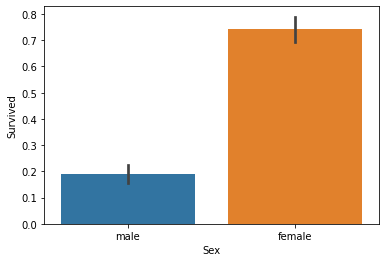

In [7]:
# 성별 별 생존률 시각화
sns.barplot(data=titanic_df, x='Sex', y='Survived')

In [8]:
# Pclass 별, 성별 별 생존 데이터 분석
titanic_df.groupby(['Pclass','Sex','Survived'])['Survived'].count()
# pclass가 높은 여성은 굉장히 높은 생존률을 보임

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

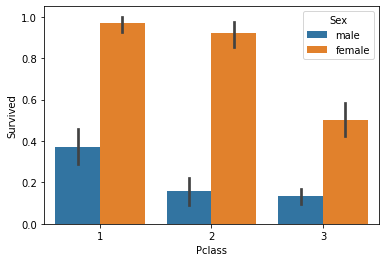

In [9]:
# Pclass 별, 성별 별 생존률 시각화
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived', hue='Sex')
# pclass가 높은 여성은 굉장히 높은 생존률을 보임, 특히 1, 여성의 경우 1에 가까운 생존률을 보임

## 데이터 범주화

In [10]:
# 나이를 구간에 따라 범주화 하는 함수
# lambda를 활용하여 Age의 모든 컬럼에 get_category 함수 적용 후 신규 컬럼 생성
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S,Young Adult


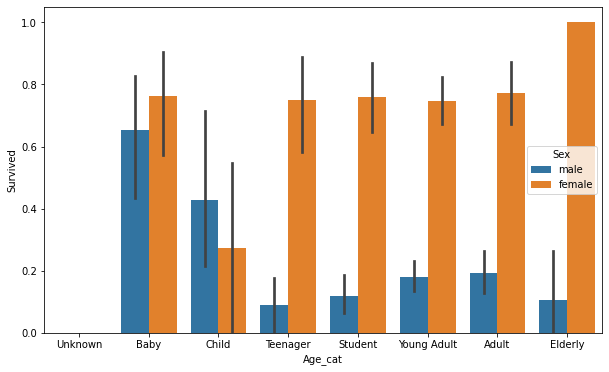

In [11]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# Seaborn을 활용하여 데이터 시각화
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [12]:
from sklearn import preprocessing
# Cabin, Sex, Embarked 컬럼에 대해 Label Encoding 수행
def encode_features(df):
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])

  return df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [13]:
from sklearn.preprocessing import LabelEncoder

# 데이터 전처리 기능 모듈화
# Null 처리 함수
def fillna(df):
  df.Age.fillna(df.Age.mean(), inplace=True) # inplace : 원본 데이터 수정
  df.Cabin.fillna('N',inplace=True) # inplace : 원본 데이터 수정
  df.Embarked.fillna('N',inplace=True) # inplace : 원본 데이터 수정
  return df

# 불필요한 속성 제거 함수
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 함수
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [14]:
# 원본 데이터 후 transform_features 함수 호출하여 전처리 
titanic_df = pd.read_csv('./train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


## 모델 생성

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 3개의 분류 모델을 사용하여 학습
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=300)

# 결정 트리
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassfies 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# 랜덤 포레스트
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('DecisionTreeClassfies 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# 로지스틱 리그레션
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('DecisionTreeClassfies 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassfies 정확도 : 0.7877
DecisionTreeClassfies 정확도 : 0.8547
DecisionTreeClassfies 정확도 : 0.8492


In [17]:
from sklearn.model_selection import KFold

# k-Fold 교차 검증 함수
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [18]:
from sklearn.model_selection import cross_val_score

# cross_val_score 사용하여 교차 검증 수행
cv = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
cv

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [19]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

# GridSearchCV 활용한 모델 학습
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('best_params_:', grid_dclf.best_params_)
print('best_score_:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred))


best_params_: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
best_score_: 0.7991825076332119
accuracy: 0.8715083798882681
